# Homework 3 Exercise 2
Now infer both the total and direct causal effects of adding food F to a
territory on the weight W of foxes. Which covariates do you need to adjust for
in each case? In light of your estimates from this problem and the previous
one, what do you think is going on with these foxes? Feel free to speculate—
all that matters is that you justify your speculation.

In [1]:
using StatsPlots
using StatisticalRethinking: sr_datadir, PI
using StatisticalRethinkingCommon
using Statistics, StatsBase
import CSV
using DataFrames
using Gen, Distributions

In [2]:
@time data = CSV.read(sr_datadir("foxes.csv"), DataFrame)

  9.894395 seconds (2.74 M allocations: 121.516 MiB, 99.97% compilation time)


,group,avgfood,groupsize,area,weight
,Int64,Float64,Int64,Float64,Float64
1,1,0.37,2,1.09,5.02
2,1,0.37,2,1.09,2.84
3,2,0.53,2,2.05,5.33
4,2,0.53,2,2.05,6.07
5,3,0.49,2,2.12,5.85
6,3,0.49,2,2.12,3.25
7,4,0.45,2,1.29,4.53
8,4,0.45,2,1.29,4.09
9,5,0.74,3,3.78,6.13


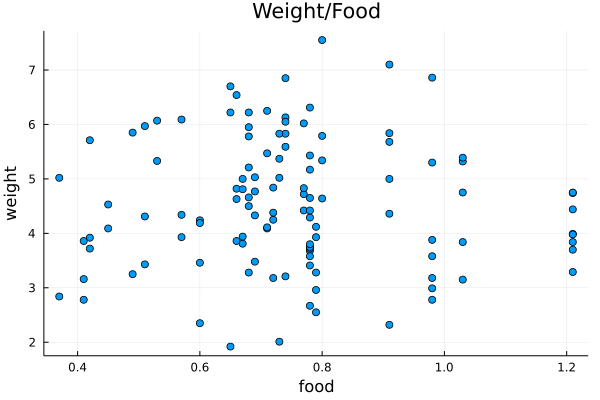

In [3]:
@df data plot(:avgfood, :weight, seriestype=:scatter, title="Weight/Food", xlabel="food", ylabel="weight", labels=nothing, legend=false)

In [ ]:
@gen function foxes_avgfood_weight_model(avgfoods)
    a ~ normal(0., 0.2)
    b ~ normal(0., 0.5)
    noise ~ gamma(1., 1.)
    
    function f(avgfood)
        return a + b * avgfood
    end
    
    for (i,avgfood) in enumerate(avgfoods)
        {(:y, i)} ~ normal(f(avg), noise)
    end
    return f
end